<a href="https://colab.research.google.com/github/lucius-yu/colab-tutorial/blob/master/fashion_mnist_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading fashion minst dataset

In [1]:
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.fashion_mnist

# load train and test images
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


show example image and label

9
0 255


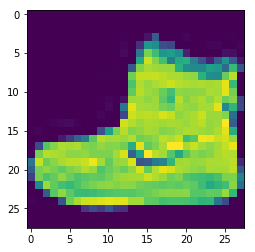

In [2]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(np.min(training_images[0]), np.max(training_images[0]))

The pixel value is range in [0, 255]. We do normalization first

In [0]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

split training data to train and validation

In [4]:
data_size=training_images.shape[0]
train_size=int(np.floor(data_size*0.6))

print(data_size)
print(train_size)
indices = np.random.permutation(data_size)
train_idx, valid_idx = indices[:train_size], indices[train_size:]

train_images, train_labels = training_images[train_idx,:], training_labels[train_idx]
valid_images, valid_labels = training_images[valid_idx,:], training_labels[valid_idx]

print(train_images.shape)
print(valid_images.shape)

60000
36000
(36000, 28, 28)
(24000, 28, 28)


Now, we build a simple DNN model

In [13]:
# build the model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer = tf.train.AdamOptimizer(learning_rate=0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the model
num_epochs=20
history=model.fit(training_images, training_labels, validation_split=0.4, epochs=num_epochs)


Train on 36000 samples, validate on 24000 samples
Epoch 1/20
36000/36000 [==============================] - 4s 108us/sample - loss: 0.7709 - acc: 0.7395 - val_loss: 0.5274 - val_acc: 0.8211
Epoch 2/20
36000/36000 [==============================] - 4s 102us/sample - loss: 0.4932 - acc: 0.8273 - val_loss: 0.4962 - val_acc: 0.8261
Epoch 3/20
36000/36000 [==============================] - 4s 103us/sample - loss: 0.4551 - acc: 0.8401 - val_loss: 0.4535 - val_acc: 0.8428
Epoch 4/20
36000/36000 [==============================] - 4s 102us/sample - loss: 0.4369 - acc: 0.8457 - val_loss: 0.4558 - val_acc: 0.8421
Epoch 5/20
36000/36000 [==============================] - 4s 103us/sample - loss: 0.4241 - acc: 0.8487 - val_loss: 0.4366 - val_acc: 0.8492
Epoch 6/20
36000/36000 [==============================] - 4s 102us/sample - loss: 0.4137 - acc: 0.8541 - val_loss: 0.4469 - val_acc: 0.8436
Epoch 7/20
36000/36000 [==============================] - 4s 102us/sample - loss: 0.4054 - acc: 0.8566 - val_l

Train the model with validation

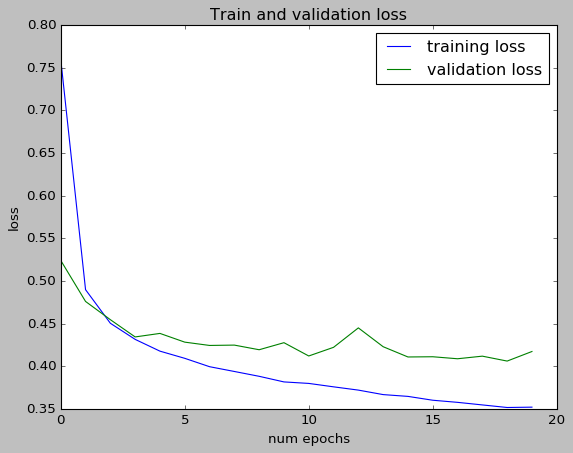

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('classic')

plt.plot(range(num_epochs), history.history['loss'], label="training loss")
plt.plot(range(num_epochs), history.history['val_loss'], label="validation loss")

plt.xlabel("num epochs")
plt.ylabel("loss")
plt.title("Train and validation loss")
plt.legend()
plt.show()

Evaluate the model

In [9]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 48us/sample - loss: 0.4441 - acc: 0.8454


[0.44412301750183103, 0.8454]

More data helpful?

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 4s 88us/sample - loss: 0.7034 - acc: 0.7694 - val_loss: 0.4953 - val_acc: 0.8323
Epoch 2/20
48000/48000 [==============================] - 4s 82us/sample - loss: 0.4796 - acc: 0.8357 - val_loss: 0.4593 - val_acc: 0.8409
Epoch 3/20
48000/48000 [==============================] - 4s 81us/sample - loss: 0.4486 - acc: 0.8468 - val_loss: 0.4454 - val_acc: 0.8482
Epoch 4/20
48000/48000 [==============================] - 4s 81us/sample - loss: 0.4329 - acc: 0.8519 - val_loss: 0.4301 - val_acc: 0.8524
Epoch 5/20
48000/48000 [==============================] - 4s 83us/sample - loss: 0.4209 - acc: 0.8556 - val_loss: 0.4396 - val_acc: 0.8459
Epoch 6/20
48000/48000 [==============================] - 4s 82us/sample - loss: 0.4140 - acc: 0.8560 - val_loss: 0.4384 - val_acc: 0.8468
Epoch 7/20
48000/48000 [==============================] - 4s 81us/sample - loss: 0.4053 - acc: 0.8600 - val_loss: 0.

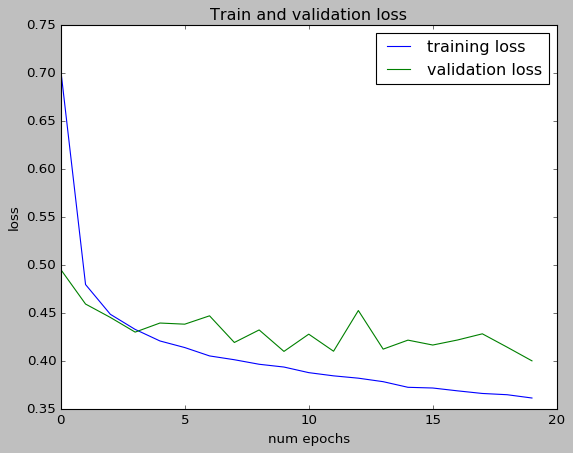

10000/10000 [==============================] - 1s 52us/sample - loss: 0.4293 - acc: 0.8493


[0.4292914530515671, 0.8493]

In [14]:
# build the model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer = tf.train.AdamOptimizer(learning_rate=0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


# train the model
num_epochs=20
history=model.fit(training_images, training_labels, validation_split=0.2, epochs=num_epochs)

plt.plot(range(num_epochs), history.history['loss'], label="training loss")
plt.plot(range(num_epochs), history.history['val_loss'], label="validation loss")

plt.xlabel("num epochs")
plt.ylabel("loss")
plt.title("Train and validation loss")
plt.legend()
plt.show()

model.evaluate(test_images, test_labels)

A wider model

Train on 45000 samples, validate on 15000 samples
Epoch 1/40
45000/45000 [==============================] - 4s 89us/sample - loss: 0.5390 - acc: 0.8134 - val_loss: 0.4269 - val_acc: 0.8493
Epoch 2/40
45000/45000 [==============================] - 4s 88us/sample - loss: 0.3871 - acc: 0.8615 - val_loss: 0.3705 - val_acc: 0.8687
Epoch 3/40
45000/45000 [==============================] - 4s 86us/sample - loss: 0.3467 - acc: 0.8742 - val_loss: 0.3588 - val_acc: 0.8705
Epoch 4/40
45000/45000 [==============================] - 4s 86us/sample - loss: 0.3193 - acc: 0.8835 - val_loss: 0.3452 - val_acc: 0.8779
Epoch 5/40
45000/45000 [==============================] - 4s 96us/sample - loss: 0.2985 - acc: 0.8887 - val_loss: 0.3576 - val_acc: 0.8649
Epoch 6/40
45000/45000 [==============================] - 5s 101us/sample - loss: 0.2830 - acc: 0.8941 - val_loss: 0.3269 - val_acc: 0.8851
Epoch 7/40
45000/45000 [==============================] - 4s 93us/sample - loss: 0.2707 - acc: 0.8994 - val_loss: 0

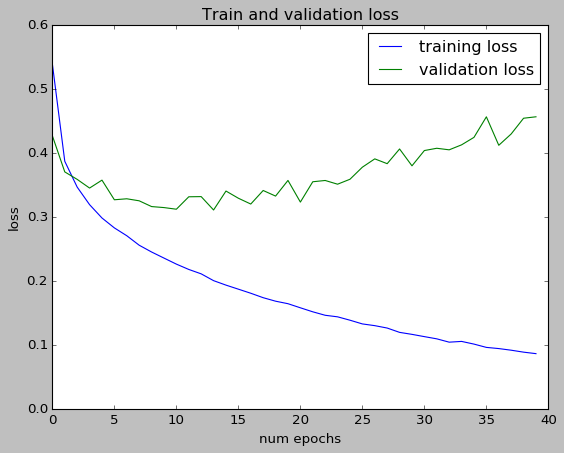

10000/10000 [==============================] - 0s 48us/sample - loss: 0.4807 - acc: 0.8873


[0.48068724842742083, 0.8873]

In [10]:
# build the model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer = tf.train.AdamOptimizer(learning_rate=0.0005),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


# train the model
num_epochs=40
history=model.fit(training_images, training_labels, validation_split=0.2, epochs=num_epochs)

plt.plot(range(num_epochs), history.history['loss'], label="training loss")
plt.plot(range(num_epochs), history.history['val_loss'], label="validation loss")

plt.xlabel("num epochs")
plt.ylabel("loss")
plt.title("Train and validation loss")
plt.legend()
plt.show()

model.evaluate(test_images, test_labels)

Using callback to implement early stopping

Train on 45000 samples, validate on 15000 samples
Epoch 1/40
45000/45000 [==============================] - 4s 92us/sample - loss: 0.5356 - acc: 0.8120 - val_loss: 0.4255 - val_acc: 0.8481
Epoch 2/40
45000/45000 [==============================] - 4s 89us/sample - loss: 0.3881 - acc: 0.8596 - val_loss: 0.4188 - val_acc: 0.8481
Epoch 3/40
45000/45000 [==============================] - 4s 89us/sample - loss: 0.3445 - acc: 0.8738 - val_loss: 0.3734 - val_acc: 0.8649
Epoch 4/40
45000/45000 [==============================] - 4s 89us/sample - loss: 0.3210 - acc: 0.8819 - val_loss: 0.3415 - val_acc: 0.8761
Epoch 5/40
45000/45000 [==============================] - 4s 94us/sample - loss: 0.3008 - acc: 0.8890 - val_loss: 0.3239 - val_acc: 0.8817
Epoch 6/40
45000/45000 [==============================] - 5s 101us/sample - loss: 0.2820 - acc: 0.8964 - val_loss: 0.3369 - val_acc: 0.8780
Epoch 7/40
45000/45000 [==============================] - 4s 98us/sample - loss: 0.2688 - acc: 0.8996 - val_loss: 0

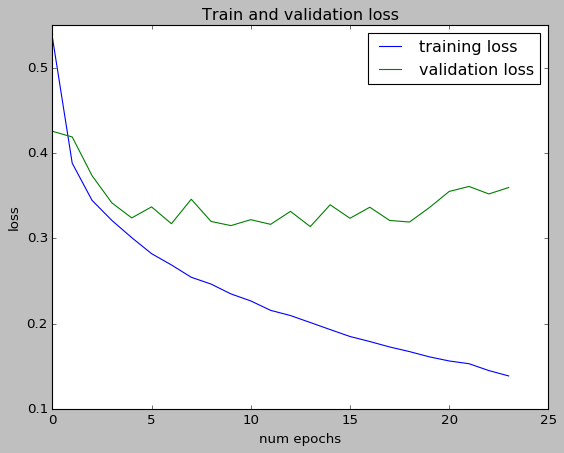

10000/10000 [==============================] - 1s 57us/sample - loss: 0.3365 - acc: 0.8853


[0.336513783621788, 0.8853]

In [11]:
callbacks = [
  # Interrupt training if `val_loss` stops improving for over 2 epochs
  tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss', restore_best_weights=True),
]


# build the model
model_2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),  
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model_2.compile(optimizer = tf.train.AdamOptimizer(learning_rate=0.0005),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


# train the model
num_epochs=40
history=model_2.fit(training_images, training_labels, validation_split=0.25,callbacks=callbacks, epochs=num_epochs)

plt.plot(range(len(history.history['loss'])), history.history['loss'], label="training loss")
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], label="validation loss")

plt.xlabel("num epochs")
plt.ylabel("loss")
plt.title("Train and validation loss")
plt.legend()
plt.show()

model_2.evaluate(test_images, test_labels)

In [0]:
# build the model
model_2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),  
                                    keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model_2.compile(optimizer = tf.train.AdamOptimizer(learning_rate=0.0005),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


# train the model
num_epochs=40
history=model_2.fit(training_images, training_labels, validation_split=0.25,callbacks=callbacks, epochs=num_epochs)

plt.plot(range(len(history.history['loss'])), history.history['loss'], label="training loss")
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], label="validation loss")

plt.xlabel("num epochs")
plt.ylabel("loss")
plt.title("Train and validation loss")
plt.legend()
plt.show()

model_2.evaluate(test_images, test_labels)

Train on 45000 samples, validate on 15000 samples
Epoch 1/40
45000/45000 [==============================] - 5s 115us/sample - loss: 0.5413 - acc: 0.8114 - val_loss: 0.4447 - val_acc: 0.8443
Epoch 2/40
45000/45000 [==============================] - 5s 105us/sample - loss: 0.3877 - acc: 0.8612 - val_loss: 0.3737 - val_acc: 0.8667
Epoch 3/40
45000/45000 [==============================] - 4s 96us/sample - loss: 0.3471 - acc: 0.8760 - val_loss: 0.3608 - val_acc: 0.8732
Epoch 4/40
45000/45000 [==============================] - 4s 96us/sample - loss: 0.3231 - acc: 0.8841 - val_loss: 0.3518 - val_acc: 0.8739
Epoch 5/40
45000/45000 [==============================] - 4s 96us/sample - loss: 0.3038 - acc: 0.8902 - val_loss: 0.3492 - val_acc: 0.8763
Epoch 6/40
45000/45000 [==============================] - 4s 97us/sample - loss: 0.2889 - acc: 0.8937 - val_loss: 0.3476 - val_acc: 0.8785
Epoch 7/40
45000/45000 [==============================] - 4s 97us/sample - loss: 0.2760 - acc: 0.9003 - val_loss: 

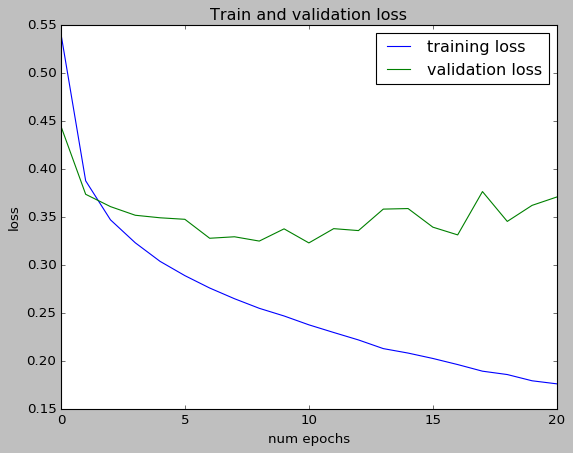

10000/10000 [==============================] - 1s 55us/sample - loss: 0.3511 - acc: 0.8787


[0.35110490401983263, 0.8787]

In [12]:
callbacks = [
  # Interrupt training if `val_loss` stops improving for over 2 epochs
  tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss', restore_best_weights=True),
]


# build the model
model_2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.L1L2(0,1e-5), activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.L1L2(0,1e-5), activation=tf.nn.relu),  
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model_2.compile(optimizer = tf.train.AdamOptimizer(learning_rate=0.0005),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


# train the model
num_epochs=40
history=model_2.fit(training_images, training_labels, validation_split=0.25,callbacks=callbacks, epochs=num_epochs)

plt.plot(range(len(history.history['loss'])), history.history['loss'], label="training loss")
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], label="validation loss")

plt.xlabel("num epochs")
plt.ylabel("loss")
plt.title("Train and validation loss")
plt.legend()
plt.show()

model_2.evaluate(test_images, test_labels)